In [62]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [64]:
tf.__version__

'2.17.0'

In [65]:
import ssl
import certifi

ssl_context = ssl.create_default_context(cafile=certifi.where())

# Classification

In [34]:
fmnist_data = keras.datasets.fashion_mnist

In [35]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 331s 13us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 17s 4us/step


In [ ]:
x_train.shape
x_test.shape
y_train.shape
y_train[:10]

(60000, 28, 28)

(10000, 28, 28)

(60000,)

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

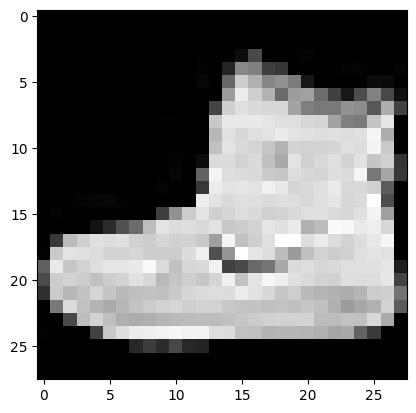

In [41]:
plt.imshow(x_train[0,], cmap="gray")

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Define Model 

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [48]:
weights, bias = model.layers[1].get_weights()

In [49]:
weights

array([[ 6.48448169e-02,  3.00132036e-02, -6.22697845e-02, ...,
         2.05633938e-02,  3.20441648e-02, -3.80951166e-02],
       [-6.09351546e-02, -5.45320213e-02,  1.06795505e-02, ...,
        -2.95738690e-02,  6.94422573e-02, -6.91025481e-02],
       [-3.72665897e-02, -5.71372807e-02,  3.96417379e-02, ...,
         6.82573915e-02,  3.10421214e-02, -7.40566999e-02],
       ...,
       [ 2.12714076e-05,  1.27147958e-02, -1.02973729e-02, ...,
        -1.46929994e-02,  3.47284675e-02,  3.09524387e-02],
       [-4.09062244e-02, -2.41729394e-02,  4.18374389e-02, ...,
        -2.71536000e-02, -3.12986858e-02, -3.33098881e-02],
       [-7.61142373e-02, -3.69788893e-02, -2.21765675e-02, ...,
         3.57285142e-03, -2.69743800e-03,  7.82497525e-02]], dtype=float32)

In [50]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Compile Model

In [51]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Fit Model

In [52]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.6544 - loss: 1.0871 - val_accuracy: 0.8104 - val_loss: 0.5509
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8143 - loss: 0.5353 - val_accuracy: 0.8287 - val_loss: 0.4890
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8303 - loss: 0.4793 - val_accuracy: 0.8374 - val_loss: 0.4654
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.8459 - loss: 0.4391 - val_accuracy: 0.8418 - val_loss: 0.4437
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8537 - loss: 0.4179 - val_accuracy: 0.8286 - val_loss: 0.4644
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.8596 - loss: 0.4047 - val_accuracy: 0.8448 - val_loss: 0.4380
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.8638 - loss: 0.3881 - val_accuracy: 0.8591 - val_loss: 0.4026
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.8654 -

In [53]:
print(history.history)

{'accuracy': [0.7449215650558472, 0.8229607939720154, 0.8371764421463013, 0.8464509844779968, 0.8520196080207825, 0.8582941293716431, 0.8631176352500916, 0.8665686249732971, 0.8696470856666565, 0.8730196356773376, 0.8754117488861084, 0.8778039216995239, 0.8791568875312805, 0.8826078176498413, 0.8854313492774963, 0.8860980272293091, 0.8881372809410095, 0.8891372680664062, 0.8920588493347168, 0.8907254934310913, 0.8938627243041992, 0.8968431353569031, 0.8976470828056335, 0.8981176614761353, 0.8993921279907227, 0.9002549052238464, 0.9030980467796326, 0.9038431644439697, 0.9049999713897705, 0.9059215784072876, 0.9068039059638977, 0.9087843298912048, 0.9096078276634216, 0.9112548828125, 0.9114117622375488, 0.9128039479255676, 0.914078414440155, 0.9154902100563049, 0.9155490398406982, 0.9156666398048401, 0.9169607758522034, 0.9180784225463867, 0.9197450876235962, 0.9207450747489929, 0.9209019541740417, 0.9221372604370117, 0.9225686192512512, 0.9244509935379028, 0.9252744913101196, 0.92639213

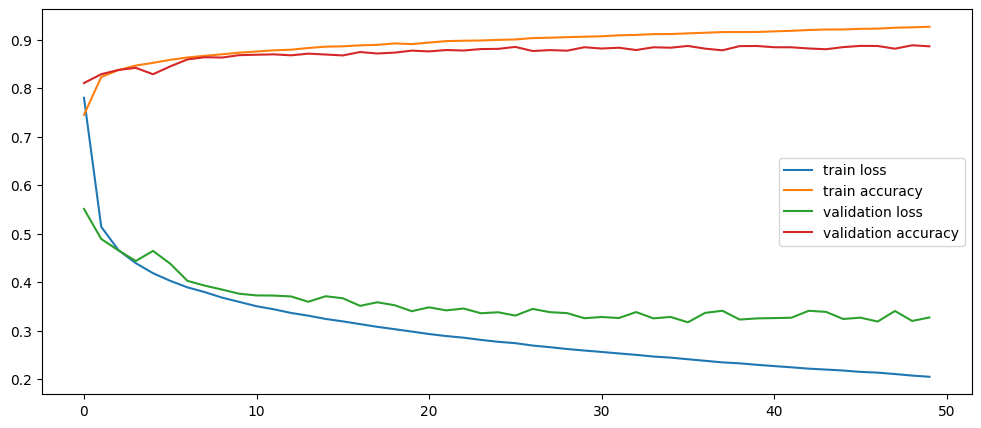

In [54]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [55]:
model.evaluate(x_test, y_test, verbose=0)

[0.35104721784591675, 0.8783000111579895]

In [56]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

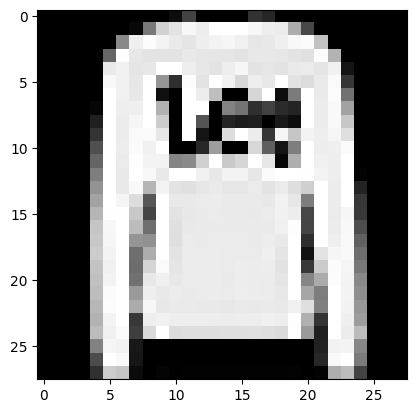

In [57]:
plt.imshow(x3[0], cmap="gray")

In [58]:
model.predict(x3).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.   , 0.   , 0.951, 0.   , 0.048, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [59]:
model.predict(x3).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(2, 10)

In [60]:
np.argmax(model.predict(x3).round(3), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([2, 1])

In [61]:
y_test[1:3]

array([2, 1], dtype=uint8)